Stock market data Analysis using pandas
Use Pandas to get stock data and get their risk

In [1]:
#importing numpy,pandas packages and DataFrame Series objects
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
#This import allows us to get data from finance sites directly
from pandas.io.data import DataReader

In [7]:
# importing datetime to work on datetime objects and division form future for floating point calculation(needed for python2.7 and below)
from datetime import datetime
from __future__ import division

In [8]:
#Stock name of companies we want to collect data
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [10]:
#Specify end date as today and start date as previous year same date
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [11]:
#Below statement is used to get stock data of Apple,Google,Microsoft and Amazon from 4/18/2015 to 4/18/2016
for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [13]:
#We can see that data is collected in dataframes with names same as the onces present in tech_list
AAPL.head()
#We can see that we have date related to opening price, High, low and close proce of a day, volume of tockes traded on a day and
#its adjusted closing price.

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-20,125.570000,128.119995,125.169998,127.599998,47054300,125.277689
2015-04-21,128.100006,128.199997,126.669998,126.910004,32435100,124.600252
2015-04-22,126.989998,128.869995,126.320000,128.619995,37654500,126.279121
2015-04-23,128.300003,130.419998,128.139999,129.669998,45770900,127.310014
2015-04-24,130.490005,130.630005,129.229996,130.279999,44525900,127.908913


In [14]:
#Below statement describes the all the columns present in the DataFrame, we can see mean, standard deviation and some more details
#related to each column in above DataFrame.
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,114.239163,115.334741,113.022629,114.187769,4.862358e+07,113.197333
std,10.947871,10.793308,11.016683,10.859009,2.102629e+07,10.264111
min,93.129997,94.500000,92.000000,93.419998,1.304640e+07,92.915814
25%,107.179997,108.244999,105.610001,106.770000,3.426585e+07,106.447392
50%,114.000000,115.419998,112.849998,114.180000,4.463320e+07,113.076422
75%,124.855000,125.750000,123.564999,124.770001,5.541565e+07,122.759470
max,134.460007,134.539993,131.399994,132.649994,1.622063e+08,130.671320


In [15]:
#We can get more details about the date in AAPL DataFrame by using info method on the DataFrame
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2015-04-20 to 2016-04-15
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


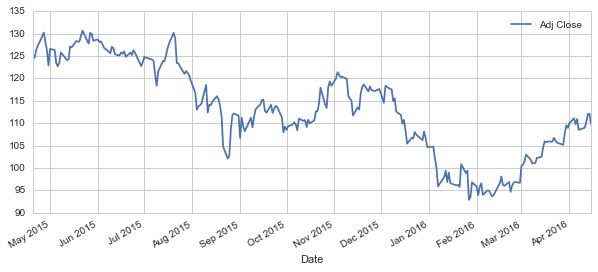

In [16]:
#Ploting the variation of apple stock's adjusted closing price.
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

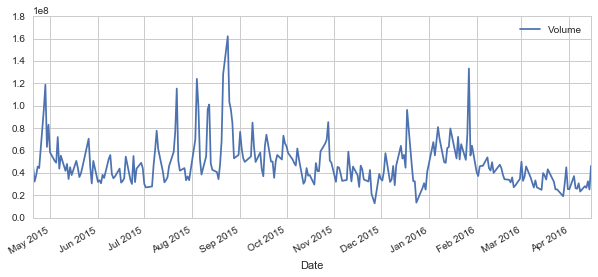

In [17]:
#Similarly ploting volume of Apple stocks traded in the previous year are.
AAPL.Volume.plot(legend=True,figsize=(10,4))

In [18]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

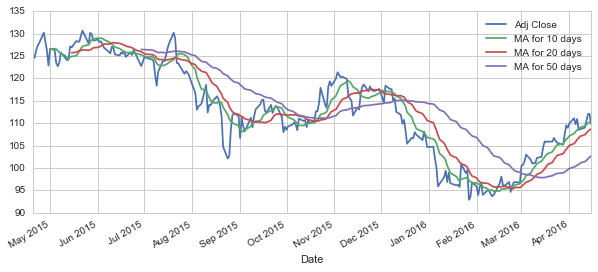

In [21]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days',"MA for 50 days"]].plot(subplots=False,figsize=(10,4))

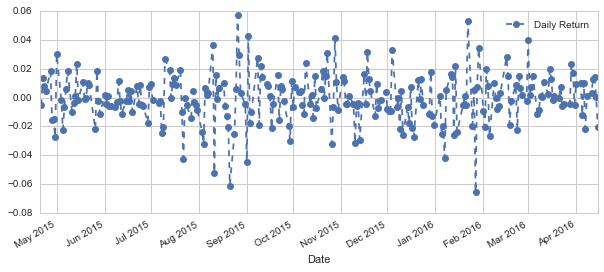

In [23]:
#Creating a new column which will be percent change of Adjusted close column
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,marker='o',linestyle='--')

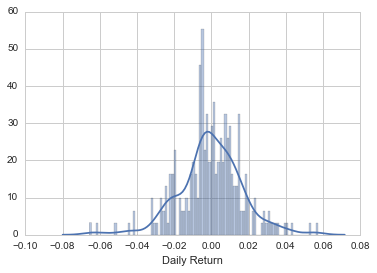

In [24]:
#Plotting daily returns on a histogram by using seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

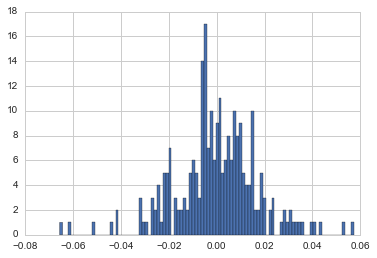

In [25]:
#Another method to use plotting histogram on 'Daily Return' column
AAPL['Daily Return'].hist(bins=100)

In [26]:
#Reading closing df for all the stock's in tech_list
closing_df=DataReader(tech_list,'yahoo',start,end)['Adj Close']
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-20,125.277689,389.510010,535.382408,41.770164
2015-04-21,124.600252,391.179993,533.972413,41.507336
2015-04-22,126.279121,389.799988,539.367458,41.848041
2015-04-23,127.310014,389.989990,547.002472,42.188742
2015-04-24,127.908913,445.100006,565.062561,46.598409


In [27]:
tech_rets=closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-20,NaN,NaN,NaN,NaN
2015-04-21,-0.005407,0.004287,-0.002634,-0.006292
2015-04-22,0.013474,-0.003528,0.010104,0.008208
2015-04-23,0.008164,0.000487,0.014155,0.008141
2015-04-24,0.004704,0.141311,0.033016,0.104522


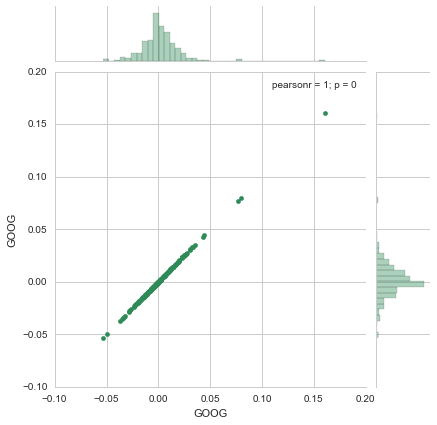

In [28]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

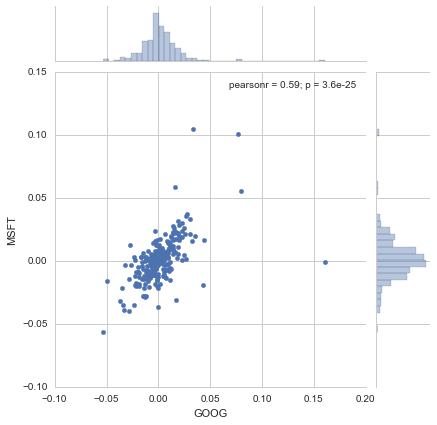

In [30]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

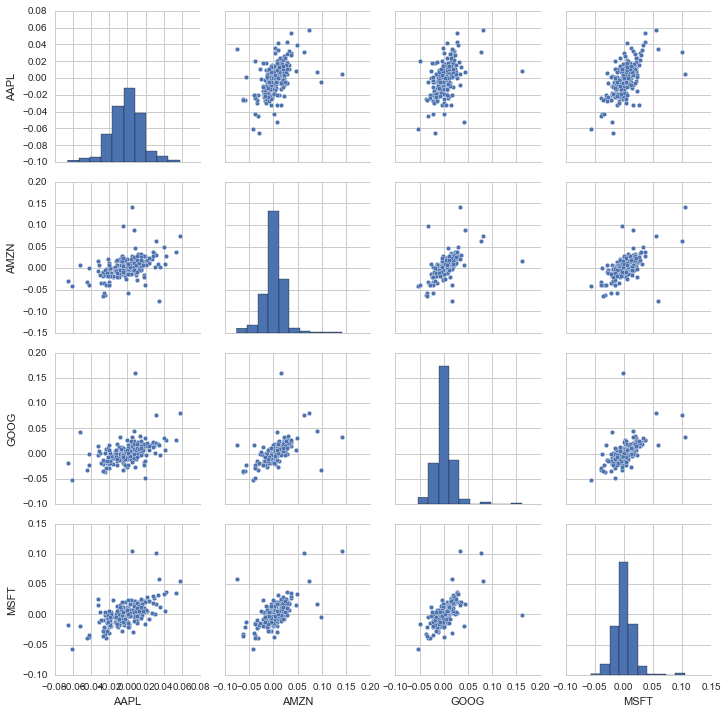

In [31]:
#pair plot using sea born
sns.pairplot(tech_rets.dropna())

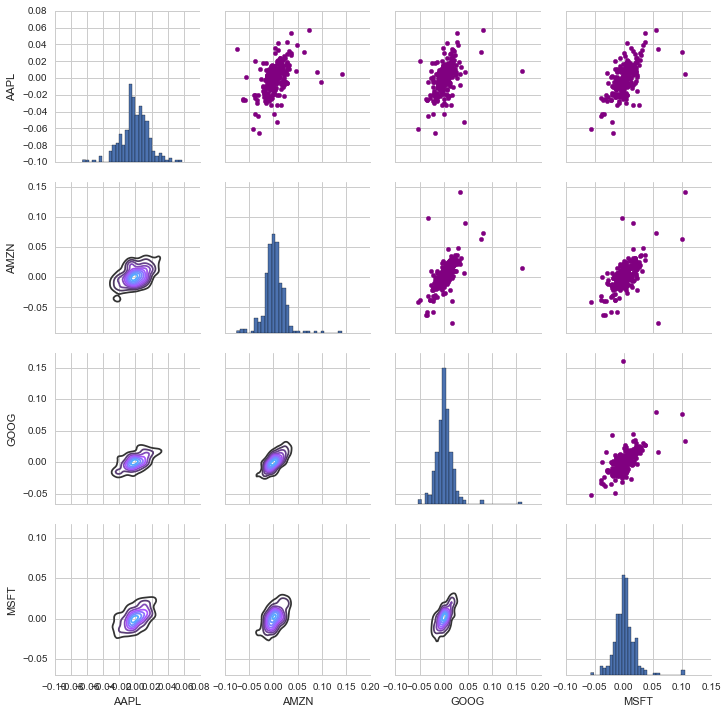

In [33]:
#We can get more contron on the plots by using pair grid
returns_fig=sns.PairGrid(tech_rets.dropna())
#Map_upper us used to plot graphs in upper grid
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

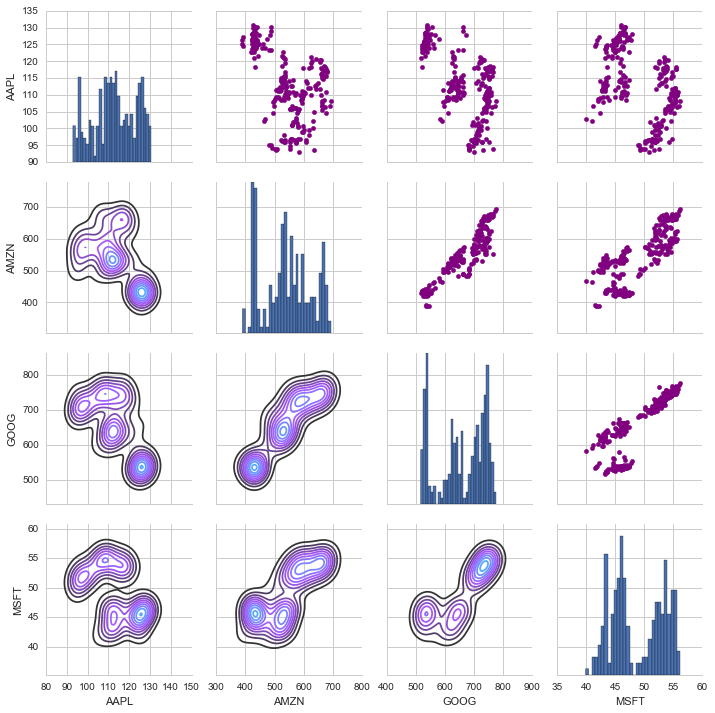

In [34]:
#We can get more contron on the plots by using pair grid
returns_fig=sns.PairGrid(closing_df)
#Map_upper us used to plot graphs in upper grid
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

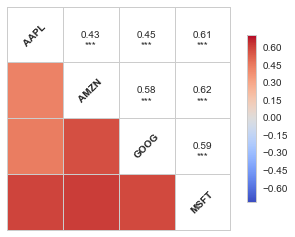

In [36]:
#Corelation plots using sea born
sns.corrplot(tech_rets.dropna(),annot=True)

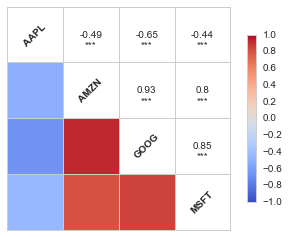

In [37]:
sns.corrplot(closing_df,annot=True)

Risk analysis plot using matplotlib
Here x axis is mean and y axis is standard deviation

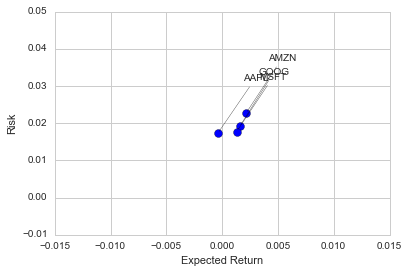

In [44]:
rets=tech_rets.dropna()
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel("Expected Return")
plt.ylabel("Risk")

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(50,50),
        textcoords='offset points',ha='right',va='bottom',
        arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=0'))

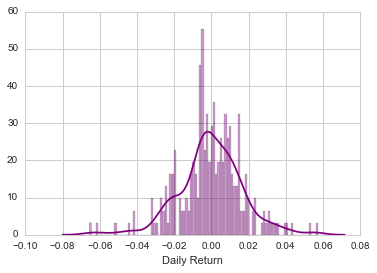

In [46]:
#Value at risk
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [47]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-04-21,-0.005407,0.004287,-0.002634,-0.006292
2015-04-22,0.013474,-0.003528,0.010104,0.008208
2015-04-23,0.008164,0.000487,0.014155,0.008141
2015-04-24,0.004704,0.141311,0.033016,0.104522
2015-04-27,0.018192,-0.014693,-0.017153,0.003342


In [48]:
rets['AAPL'].quantile(0.05)

-0.02690671138946403

In [49]:
#Risk analysis using monte carlo method
days=365
dt=1/365
mu=rets.mean()['GOOG']
sigma=rets.std()['GOOG']

In [60]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price

In [51]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-04-20,525.602352,536.092424,524.502350,535.382408,1679200,535.382408
2015-04-21,537.512456,539.392429,533.677415,533.972413,1844700,533.972413
2015-04-22,534.402426,541.082428,531.752397,539.367458,1593500,539.367458
2015-04-23,541.002435,550.962490,540.232440,547.002472,4184800,547.002472
2015-04-24,566.102584,571.142590,557.252507,565.062561,4932500,565.062561


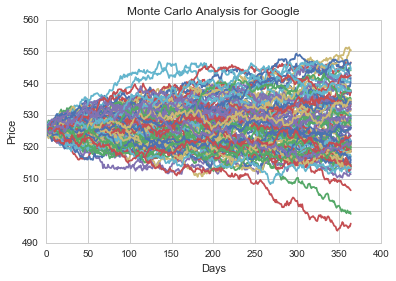

In [65]:
start_price=525.60
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [66]:
runs=10000
simulations=np.zeros(runs)
for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

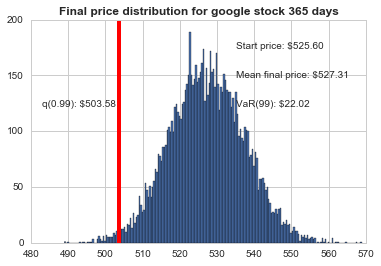

In [67]:
q=np.percentile(simulations,1)
plt.hist(simulations,bins=200)
plt.figtext(0.6,0.8,s='Start price: $%.2f' %start_price)

plt.figtext(0.6,0.7, 'Mean final price: $%.2f' %simulations.mean())

plt.figtext(0.6,0.6, 'VaR(99): $%.2f' %(start_price-q,))
plt.figtext(0.15,0.6, "q(0.99): $%.2f" %q)
plt.axvline(x=q,linewidth=4,color='r')
plt.title("Final price distribution for google stock %s days" %days,weight='bold');